## An analysis on how agricultural practices have changed over time and how these changes are related to socio-economic factors ##

### First, data wrangling and extraction... ###

This data was first uploaded from our INE database, organized, and then converted to a csv file for simpler sharing of the files.

The data contains information from the years 1989, 1999, 2009 and 2019 on the education levels and value, labor type and value, production value (in euros) and production area (in ha), livestock type and counts, temporary crop type, counts and area, permanent crop type, counts (in number of holdings), and area, and permanent crop type, counts (in number of holdings), and area. All of the rows of data are organized by freguesia name. 

In [1]:
# import necessary libraries

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '/Users/ines/greendatascience/AVCADo/final_project/output.csv' 
data = pd.read_csv(file_path)

print("Shape of the dataframe: ",data.shape)
data.isna().sum()

Shape of the dataframe:  (322560, 26)


NutsID                         0
DICOFRE_x                      0
freguesia_x                    0
year                           0
education_level            80640
education_value                0
type_labour                    0
labour_value                   0
production_value_eur       80640
production_area_ha         80640
DICOFRE_y                      0
freguesia_y                    0
grassland_year                 0
grassland_area                 0
grassland_holdings             0
animal_species                 0
livestock_year                 0
livestock_value                0
temporary_crop_year            0
temporary_crop_area            0
temporary_crop_holdings        0
temporary_crop_name            0
permanent_crop_year            0
permanent_crop_area            0
permanent_crop_holdings        0
permanent_crop_name            0
dtype: int64

In [3]:
data.head()

,NutsID,DICOFRE_x,freguesia_x,year,education_level,education_value,type_labour,labour_value,production_value_eur,production_area_ha,...,livestock_year,livestock_value,temporary_crop_year,temporary_crop_area,temporary_crop_holdings,temporary_crop_name,permanent_crop_year,permanent_crop_area,permanent_crop_holdings,permanent_crop_name
0,111160101,160101,Aboim das Choças,1989,NaN,167,Total labour force in agriculture,168,NaN,NaN,...,2019,63,2019,6,19,Cereals,2019,0,0,Fresh fruit plantations (excluding citrus plan...
1,111160101,160101,Aboim das Choças,1989,NaN,167,Total labour force in agriculture,168,NaN,NaN,...,2019,63,2019,0,1,Dried pulses,2019,0,0,Fresh fruit plantations (excluding citrus plan...
2,111160101,160101,Aboim das Choças,1989,NaN,167,Total labour force in agriculture,168,NaN,NaN,...,2019,63,2019,0,0,Temporary grasses and grazings,2019,0,0,Fresh fruit plantations (excluding citrus plan...
3,111160101,160101,Aboim das Choças,1989,NaN,167,Total labour force in agriculture,168,NaN,NaN,...,2019,63,2019,5,7,Fodder plants,2019,0,0,Fresh fruit plantations (excluding citrus plan...
4,111160101,160101,Aboim das Choças,1989,NaN,167,Total labour force in agriculture,168,NaN,NaN,...,2019,63,2019,0,7,Potatoes,2019,0,0,Fresh fruit plantations (excluding citrus plan...


In [4]:
# drop null values

data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181440 entries, 11200 to 322559
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NutsID                   181440 non-null  int64  
 1   DICOFRE_x                181440 non-null  int64  
 2   freguesia_x              181440 non-null  object 
 3   year                     181440 non-null  int64  
 4   education_level          181440 non-null  object 
 5   education_value          181440 non-null  int64  
 6   type_labour              181440 non-null  object 
 7   labour_value             181440 non-null  int64  
 8   production_value_eur     181440 non-null  float64
 9   production_area_ha       181440 non-null  float64
 10  DICOFRE_y                181440 non-null  int64  
 11  freguesia_y              181440 non-null  object 
 12  grassland_year           181440 non-null  int64  
 13  grassland_area           181440 non-null  int64  
 14  grass

In [6]:
data.describe()

,NutsID,DICOFRE_x,year,education_value,labour_value,production_value_eur,production_area_ha,DICOFRE_y,grassland_year,grassland_area,grassland_holdings,livestock_year,livestock_value,temporary_crop_year,temporary_crop_area,temporary_crop_holdings,permanent_crop_year,permanent_crop_area,permanent_crop_holdings
count,181440.0,181440.0,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000,181440.0,181440.000000,181440.000000,181440.00000,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000,181440.000000
mean,111160101.0,160101.0,2009.000000,25.555556,16.666667,123286.666667,1713.800000,160101.0,2004.000000,29.000000,10.00000,2004.000000,112.687500,2004.000000,7.500000,17.775000,2004.000000,2.250000,6.714286
std,0.0,0.0,8.164988,27.301321,19.810265,30503.145515,427.244878,0.0,11.180371,16.628335,6.04154,11.180371,215.305092,11.180371,14.769943,25.642309,11.180371,6.162258,18.187285
min,111160101.0,160101.0,1999.000000,4.000000,0.000000,101072.000000,1118.500000,160101.0,1989.000000,6.000000,2.00000,1989.000000,0.000000,1989.000000,0.000000,0.000000,1989.000000,0.000000,0.000000
25%,111160101.0,160101.0,1999.000000,6.000000,0.000000,101072.000000,1118.500000,160101.0,1996.500000,22.500000,5.75000,1996.500000,4.000000,1996.500000,0.000000,0.000000,1996.500000,0.000000,0.000000
50%,111160101.0,160101.0,2009.000000,7.000000,8.000000,102370.000000,1921.900000,160101.0,2004.000000,28.500000,10.00000,2004.000000,37.000000,2004.000000,0.000000,3.000000,2004.000000,0.000000,0.000000
75%,111160101.0,160101.0,2019.000000,57.000000,26.000000,166418.000000,2101.000000,160101.0,2011.500000,35.000000,14.25000,2011.500000,80.000000,2011.500000,8.250000,24.750000,2011.500000,0.000000,0.250000
max,111160101.0,160101.0,2019.000000,73.000000,63.000000,166418.000000,2101.000000,160101.0,2019.000000,53.000000,18.00000,2019.000000,925.000000,2019.000000,60.000000,80.000000,2019.000000,28.000000,84.000000


In [7]:
data.dtypes

NutsID                       int64
DICOFRE_x                    int64
freguesia_x                 object
year                         int64
education_level             object
education_value              int64
type_labour                 object
labour_value                 int64
production_value_eur       float64
production_area_ha         float64
DICOFRE_y                    int64
freguesia_y                 object
grassland_year               int64
grassland_area               int64
grassland_holdings           int64
animal_species              object
livestock_year               int64
livestock_value              int64
temporary_crop_year          int64
temporary_crop_area          int64
temporary_crop_holdings      int64
temporary_crop_name         object
permanent_crop_year          int64
permanent_crop_area          int64
permanent_crop_holdings      int64
permanent_crop_name         object
dtype: object

## Explanatory data analysis ##

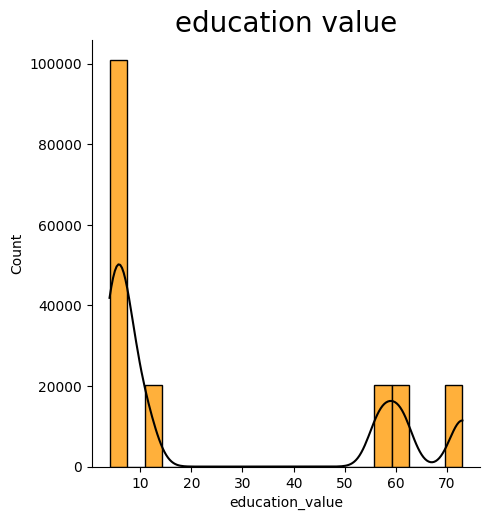

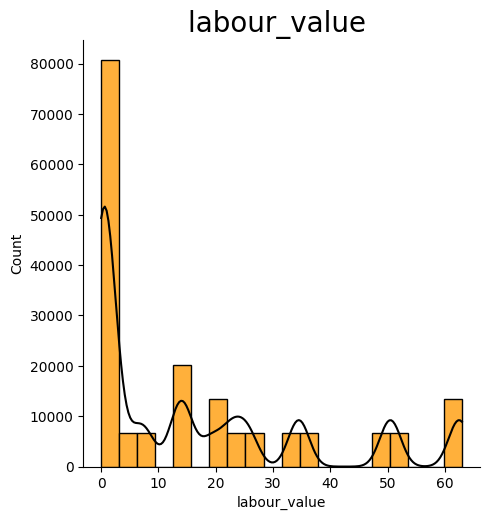

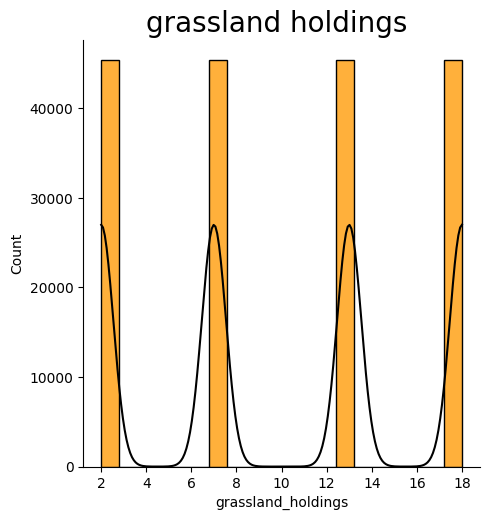

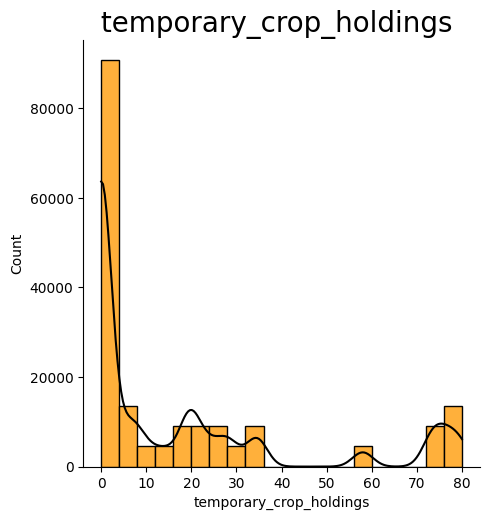

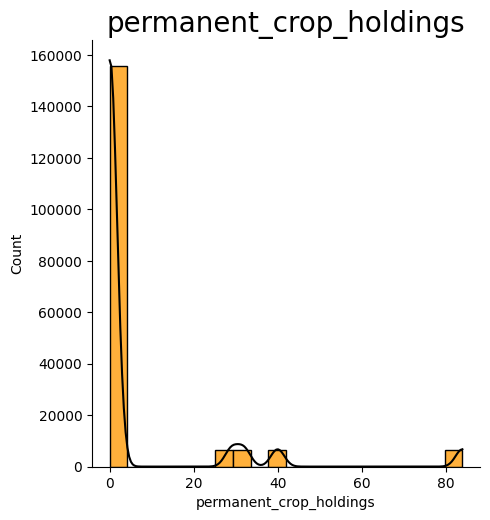

In [28]:
# look at data distribution of major columns of interest

sns.displot(x=data['education_value'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("education value",size=20)
plt.show()

sns.displot(x=data['labour_value'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("labour_value ",size=20)
plt.show()

sns.displot(x=data['grassland_holdings'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("grassland holdings ",size=20)
plt.show()

sns.displot(x=data['temporary_crop_holdings'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title(" temporary_crop_holdings  ",size=20)
plt.show()

sns.displot(x=data['permanent_crop_holdings'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("permanent_crop_holdings",size=20)
plt.show()

A categorical plot to understand how our data varies by category

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categoric

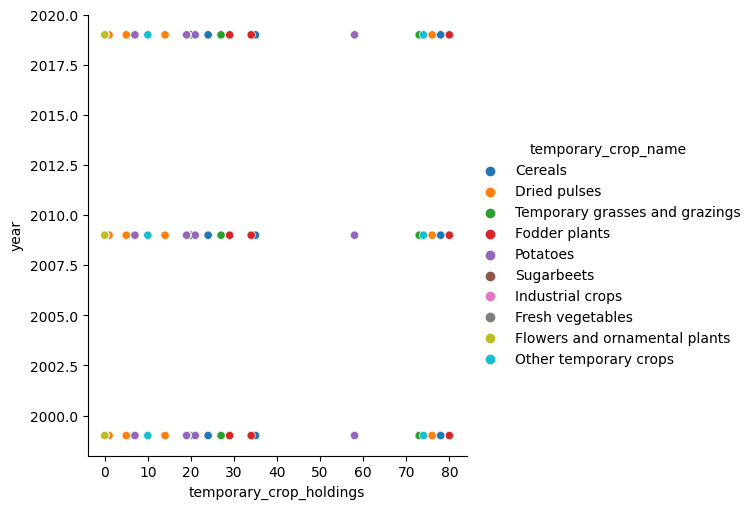

In [16]:
sns.relplot(x='temporary_crop_holdings',y='year',data=data,kind='scatter',hue='temporary_crop_name',height=5)
plt.show()

ValueError: Could not interpret value `production_area` for parameter `y`

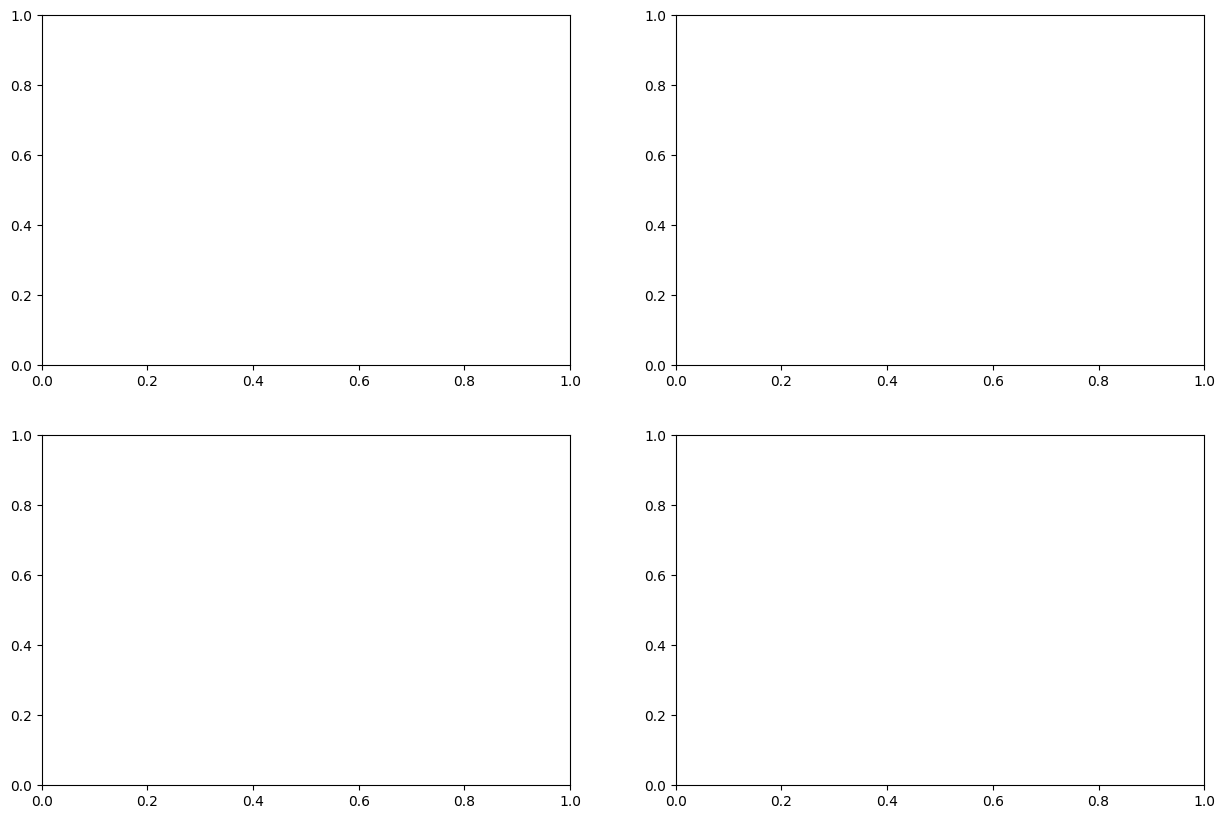

In [18]:
# Line plots for temporal trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(data=data, x='year', y='production_area', ax=axes[0, 0])
axes[0, 0].set_title('Temporal Trend of Production Area')

sns.lineplot(data=data, x='year', y='livestock_cattle', ax=axes[0, 1])
axes[0, 1].set_title('Temporal Trend of Livestock Cattle')

sns.lineplot(data=data, x='year', y='type_labour', ax=axes[1, 0])
axes[1, 0].set_title('Temporal Trend of Family Labour')

sns.lineplot(data=data, x='year', y='education_level', ax=axes[1, 1])
axes[1, 1].set_title('Temporal Trend of Higher Education')

plt.tight_layout()
plt.show()